In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras

# 가중치 초기화

층을 만들 때 kernel_initializer로 지정할 수 있다

* 글로럴 | 하이퍼볼릭 탄젠트, 로지스틱, 소프트맥스 (케라스의 디폴트 : Uniform 기반의 글로럿 초기화)

* He | Relu,  RRelu, PRelu, ELU, LeakyRelu

* 르쿤 | SELU

In [2]:
# 예시
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# 활성화 함수

SELU > ELU > LeakyRelu > Relu > tanh > 로지스틱 순으로 사용한다

SELU는 자기 정규화 성질이 있다 (완전연결 신경망에만 해당, 반드시 르쿤 초기화, 반드시 Feature를 정규화 해야함)

Grid-Search로 최적의 파라미터를 찾을 수 있다

In [10]:
# LeakyRelu를 사용한 예시

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
# 모델 만들기
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2455 - accuracy: 0.6301 - val_loss: 0.8617 - val_accuracy: 0.7320
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7793 - accuracy: 0.7513 - val_loss: 0.7045 - val_accuracy: 0.7748
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6744 - accuracy: 0.7799 - val_loss: 0.6321 - val_accuracy: 0.7938
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6187 - accuracy: 0.7955 - val_loss: 0.5902 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5827 - accuracy: 0.8049 - val_loss: 0.5620 - val_accuracy: 0.8134
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5568 - accuracy: 0.8122 - val_loss: 0.5393 - val_accuracy: 0.8216
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5367 - accuracy: 0.8176 - val_loss: 0.5229 - val_accuracy:

In [ ]:
# Elu  -> keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal")
# SELU -> keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

# 배치 정규화

심층신경망에서 매우 널리 사용되며, 보통 모든 층 뒤에 배치 정규화가 있다고 가정된다

그라디언트 소실과 폭주 문제를 해결하기 위해 사용

Input을 정규화한 후, 스케일을 조정하고 이동시킨다

BatchNormalization을 사용할 때, Bias는 필요없는 파라미터라서 없애고 사용해도 된다 (use_bias=False)

In [12]:
keras.backend.clear_session()

In [16]:
# Activation fucntion 이후에 BatchNormalization을 사용
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu",use_bias=False), # 아래와 한세트
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",use_bias=False), # 아래와 한세트
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax") # 출력이라서 이거 이후에는 BatchNormalization 필요없음
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [15]:
# Activation fucntion 이전에 BatchNormalization을 사용 -> Activation 함수를 따로 빼야함
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30000     
_________________________________________________________________
activation_3 (Activation)    (None, 100)              

# 그라디언트 클립핑

역전파 떄, 일정 임곗값을 넘어선 그라디언트를 잘라내는 것이다

RNN은 배치정규화 적용이 힘들어서, 이 방식을 많이 사용한다

In [ ]:
# clipvalue or clipvalue를 주면 된다
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

# 사전 훈련된 층 재사용하기

    1. 다른 모델을 가져와서, 일부 층의 파라미터를 동결하고, 일부층만 학습시킴
    2. 이후, 모든 층의 동결을 해제하고 학습시킴

전의학습은 일반적인 DNN에서는 잘 작동하지 않음

In [18]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

Epoch 1/20
1375/1375 [==============================] - 8s 4ms/step - loss: 0.5616 - accuracy: 0.8183 - val_loss: 0.3779 - val_accuracy: 0.8732
Epoch 2/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3504 - accuracy: 0.8778 - val_loss: 0.3182 - val_accuracy: 0.8914
Epoch 3/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3130 - accuracy: 0.8907 - val_loss: 0.2959 - val_accuracy: 0.8981
Epoch 4/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2939 - accuracy: 0.8975 - val_loss: 0.2857 - val_accuracy: 0.9008
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2814 - accuracy: 0.9024 - val_loss: 0.2753 - val_accuracy: 0.9046
Epoch 6/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2723 - accuracy: 0.9056 - val_loss: 0.2637 - val_accuracy: 0.9088
Epoch 7/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2649 - accuracy: 0.9096 - val_loss: 0.2588 - val_accuracy:

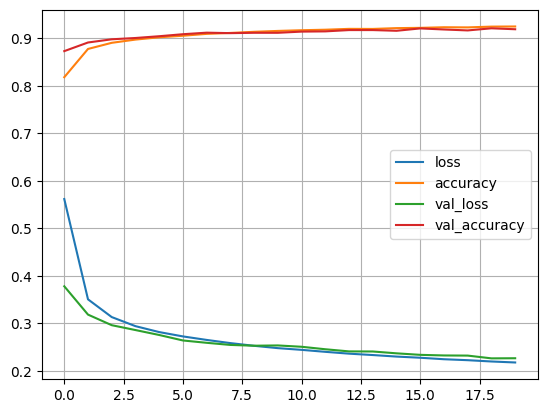

In [19]:
# Model A를 학습시킨다 (8개의 Class를 가진 분류문제, Sandal, Shirt를 제외한 나머지로 학습)
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

pd.DataFrame(history.history).plot()
plt.grid(True);

In [20]:
model_A.save("my_model_A.h5")

In [21]:
# Sandal, Shirrt만 가진 200개의 작은 데이터셋으로 학습한 Model B를 만든다
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 44ms/step - loss: 0.7817 - accuracy: 0.6150 - val_loss: 0.6401 - val_accuracy: 0.6998
Epoch 2/20
7/7 [==============================] - 0s 27ms/step - loss: 0.5451 - accuracy: 0.7350 - val_loss: 0.4900 - val_accuracy: 0.7911
Epoch 3/20
7/7 [==============================] - 0s 25ms/step - loss: 0.4106 - accuracy: 0.8300 - val_loss: 0.3893 - val_accuracy: 0.8611
Epoch 4/20
7/7 [==============================] - 0s 23ms/step - loss: 0.3234 - accuracy: 0.9000 - val_loss: 0.3298 - val_accuracy: 0.8945
Epoch 5/20
7/7 [==============================] - 0s 22ms/step - loss: 0.2696 - accuracy: 0.9400 - val_loss: 0.2854 - val_accuracy: 0.9239
Epoch 6/20
7/7 [==============================] - 0s 22ms/step - loss: 0.2303 - accuracy: 0.9800 - val_loss: 0.2515 - val_accuracy: 0.9432
Epoch 7/20
7/7 [==============================] - 0s 22ms/step - loss: 0.2007 - accuracy: 0.9900 - val_loss: 0.2236 - val_accuracy: 0.9564
Epoch 8/20
7/7 [===========

`model_B_on_A`와 `model_A`는 층을 공유하기 때문에 하나를 훈련하면 두 모델이 업데이트됩니다. 이를 피하려면 `model_A`를 클론한 것을 사용해 `model_B_on_A`를 만들어야 합니다:

clone_model은 가중치를 복제하지 않기 때문에, 가중치도 따로 가져와야 한다

In [23]:
# 모델 A를 가져와서, 데이터 B에다가 학습시킴

model_A_clone = keras.models.clone_model(model_A) # 깊은 복사라고 할 수 있음
model_A_clone.set_weights(model_A.get_weights())

model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1]) #출력층을 제외한 레이어를 사용
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))  # 새로운 출력층을 만든다

In [26]:
# 처음 몇번의 에포크 동안은 새로운 층에게 적절한 가중치를 학습할 시간을 줘야하기 때문에,
## 재사용된 층을 동결하고 학습을 진행해야한다

# 일단 일부 층을 동결
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                     metrics=["accuracy"])

history1 = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                            validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
# 모델을 동결하거나/ 동결을 해제한 후에는, 반드시 다시 compile해야한다
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                     metrics=["accuracy"])

history2 = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                            validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 45ms/step - loss: 0.1394 - accuracy: 0.9800 - val_loss: 0.1517 - val_accuracy: 0.9736
Epoch 2/4
7/7 [==============================] - 0s 24ms/step - loss: 0.1134 - accuracy: 0.9800 - val_loss: 0.1303 - val_accuracy: 0.9777
Epoch 3/4
7/7 [==============================] - 0s 23ms/step - loss: 0.0967 - accuracy: 0.9850 - val_loss: 0.1156 - val_accuracy: 0.9797
Epoch 4/4
7/7 [==============================] - 0s 21ms/step - loss: 0.0850 - accuracy: 0.9900 - val_loss: 0.1049 - val_accuracy: 0.9807
Epoch 1/16
7/7 [==============================] - 1s 38ms/step - loss: 0.0626 - accuracy: 0.9900 - val_loss: 0.0631 - val_accuracy: 0.9888
Epoch 2/16
7/7 [==============================] - 0s 21ms/step - loss: 0.0370 - accuracy: 0.9950 - val_loss: 0.0496 - val_accuracy: 0.9899
Epoch 3/16
7/7 [==============================] - 0s 21ms/step - loss: 0.0265 - accuracy: 0.9950 - val_loss: 0.0424 - val_accuracy: 0.9899
Epoch 4/16
7/7 [===============

In [27]:
# 데이터 200개만 가지고 학습시킨 model B의 성능
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9845


[0.09968601912260056, 0.984499990940094]

In [28]:
# 모델 A를 가져와서 B로 다시 학습시킨 모델
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9970


[0.014877846464514732, 0.996999979019165]

# 고속 옵티마이저

In [ ]:
# Momentum
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nestrov accelerated Gradient (기본 모멘텀 최적화보다 항상 더 빠르다)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# RMSProp : 학습률을 서서히 감소시키면서 학습한다
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) # rho는 감쇠율인데, 보통 0.9로 많이 사용한다

# Adam : Momentum + RMSProp
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# 학습률 스케줄링

큰 학습률로 시작해서, 학습속도가 느려질 때 학습률을 점점 낮춰간다

    * 거듭제곱 기반 스케줄링 : 학습률은 스텝마다 감소, 처음에 빠르게 감소하다가 점점 느리게 감소

    * 지수 기반 스케줄링 : 스텝마다 감소, s번 스텝마다 계속 10배씩 감소한다

    * 구간별 고정 스케줄링 : 일정 에포크 동안 일정한 학습률, 이후 다음 일정 에포크 동안 일정한 학습률 사용

In [ ]:
# 거듭제곱 기반 